In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [53]:
db=pd.read_csv("imdb-movies-dataset.csv")
db

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


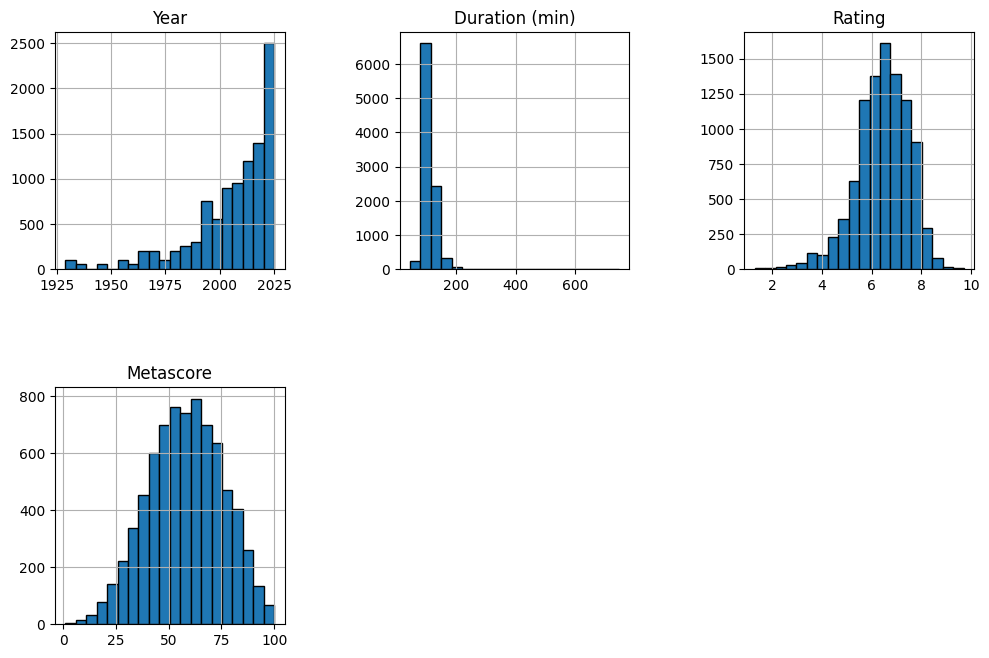

In [54]:
db.hist(figsize=(10,10), bins=20, layout=(3,3),edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

In [55]:
db.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [56]:
db.isnull().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [57]:
db.drop(columns=['Cast'], inplace=True)
db.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [58]:
for column in db.columns:
    percentage = db[column].isnull().mean()
    print(f'{column}: {percentage:.2%}')

Poster: 0.00%
Title: 0.00%
Year: 1.50%
Certificate: 26.30%
Duration (min): 3.36%
Genre: 0.07%
Rating: 4.04%
Metascore: 24.45%
Director: 0.05%
Votes: 4.04%
Description: 0.00%
Review Count: 0.01%
Review Title: 5.17%
Review: 5.16%


In [59]:
db.dtypes

Poster             object
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object

In [60]:
# Definim maparea categoriilor de vârstă la valori numerice
certificate_mapping = {
    "G": 0,
    "PG": 10,
    "PG-13": 13,
    "R": 17,
    "NC-17": 18
}

# Aplicăm maparea
db['Certificate'] = db['Certificate'].map(certificate_mapping)

# Calculăm media și completăm valorile lipsă
mean_certificate = db['Certificate'].mean()
db['Certificate'].fillna(round(mean_certificate), inplace=True)

# Convertim în Int64
db['Certificate'] = db['Certificate'].astype('Int64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5300\3913050420.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['Certificate'].fillna(round(mean_certificate), inplace=True)


In [61]:
db['Votes'] = pd.to_numeric(db['Votes'].str.replace(',', ''), errors='coerce').fillna(0).astype('Int64')

In [62]:
# Înlocuiește eventualele virgule și spații, apoi convertește în int
db['Review Count'] = db['Review Count'].astype(str).str.replace(',', '').str.strip()

# Convertește în int64, ignorând sau înlocuind valorile invalide
db['Review Count'] = pd.to_numeric(db['Review Count'], errors='coerce').fillna(0).astype('int64')

In [63]:
# Eliminăm coloanele 'Review Title' și 'Review'
db = db.drop(columns=['Poster','Review Title', 'Review'])
db['Director'] = db['Director'].fillna('Unknown')

# Afișăm primele 5 rânduri pentru confirmare
db.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Votes,Description,Review Count
0,The Idea of You,2023.0,17,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,28744,"Solène, a 40-year-old single mom, begins an un...",166
1,Kingdom of the Planet of the Apes,2023.0,13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,22248,"Many years after the reign of Caesar, a young ...",183
2,Unfrosted,2023.0,13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,18401,"In 1963 Michigan, business rivals Kellogg's an...",333
3,The Fall Guy,2023.0,13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,38953,A down-and-out stuntman must find the missing ...,384
4,Challengers,2023.0,17,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,32517,"Tashi, a former tennis prodigy turned coach, t...",194


In [64]:
# Refacem setul de genuri unice din coloana 'Genre'
genre_set = set()

for genre_list in db['Genre'].dropna():
    genres = [g.strip() for g in genre_list.split(',')]
    genre_set.update(genres)

# Creăm o coloană binară pentru fiecare gen
for genre in genre_set:
    db[genre] = db['Genre'].apply(lambda x: int(genre in x) if pd.notnull(x) else 0)

db.head()
db =db.drop(columns = ['Genre'])

In [65]:
cols_to_convert = ['Year', 'Duration (min)', 'Rating', 'Metascore']

for col in cols_to_convert:
    # Curățare + conversie la float
    db[col] = pd.to_numeric(db[col].astype(str).str.replace(',', ''), errors='coerce')
    # Rotunjire și conversie la Int64
    db[col] = db[col].round().astype('Int64')



In [66]:
db.dtypes

Title             object
Year               Int64
Certificate        Int64
Duration (min)     Int64
Rating             Int64
Metascore          Int64
Director          object
Votes              Int64
Description       object
Review Count       int64
War                int64
Horror             int64
Animation          int64
Musical            int64
Biography          int64
Film-Noir          int64
Romance            int64
Adventure          int64
Mystery            int64
Drama              int64
Fantasy            int64
Documentary        int64
Thriller           int64
Comedy             int64
Sport              int64
Western            int64
Family             int64
Crime              int64
Music              int64
History            int64
Sci-Fi             int64
Action             int64
dtype: object

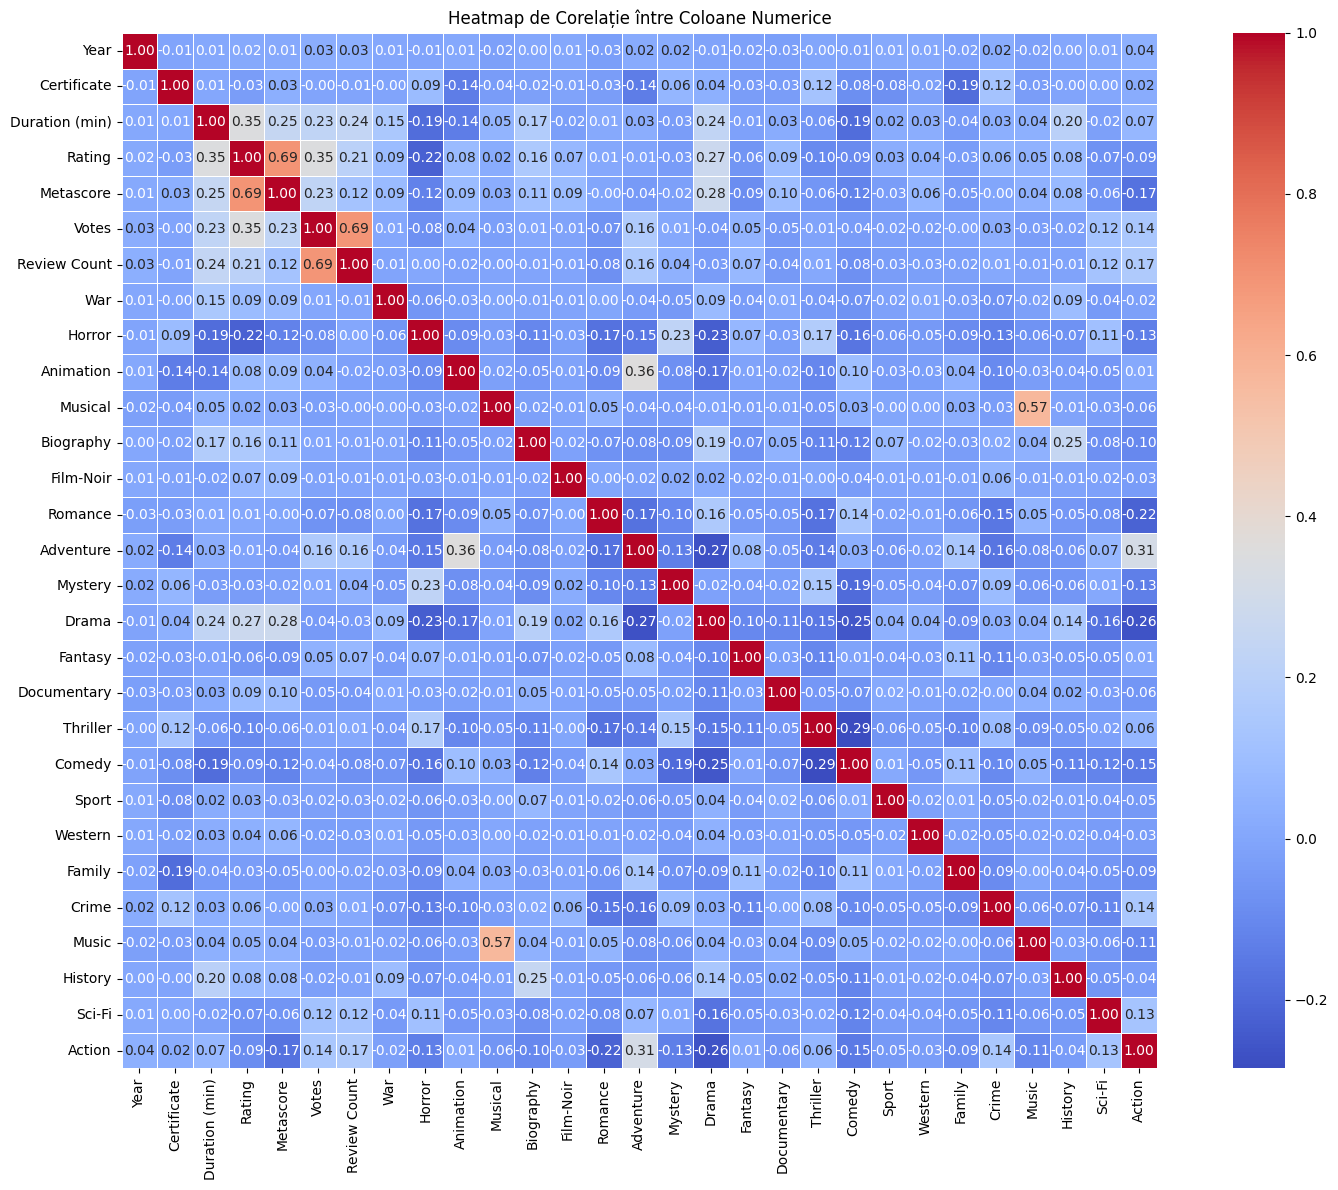

In [67]:
# Recărcăm matricea de corelație
correlation_matrix = db.select_dtypes(include=['int64', 'float64']).corr()

# Afișăm din nou heatmap-ul
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap de Corelație între Coloane Numerice')
plt.tight_layout()
plt.show()

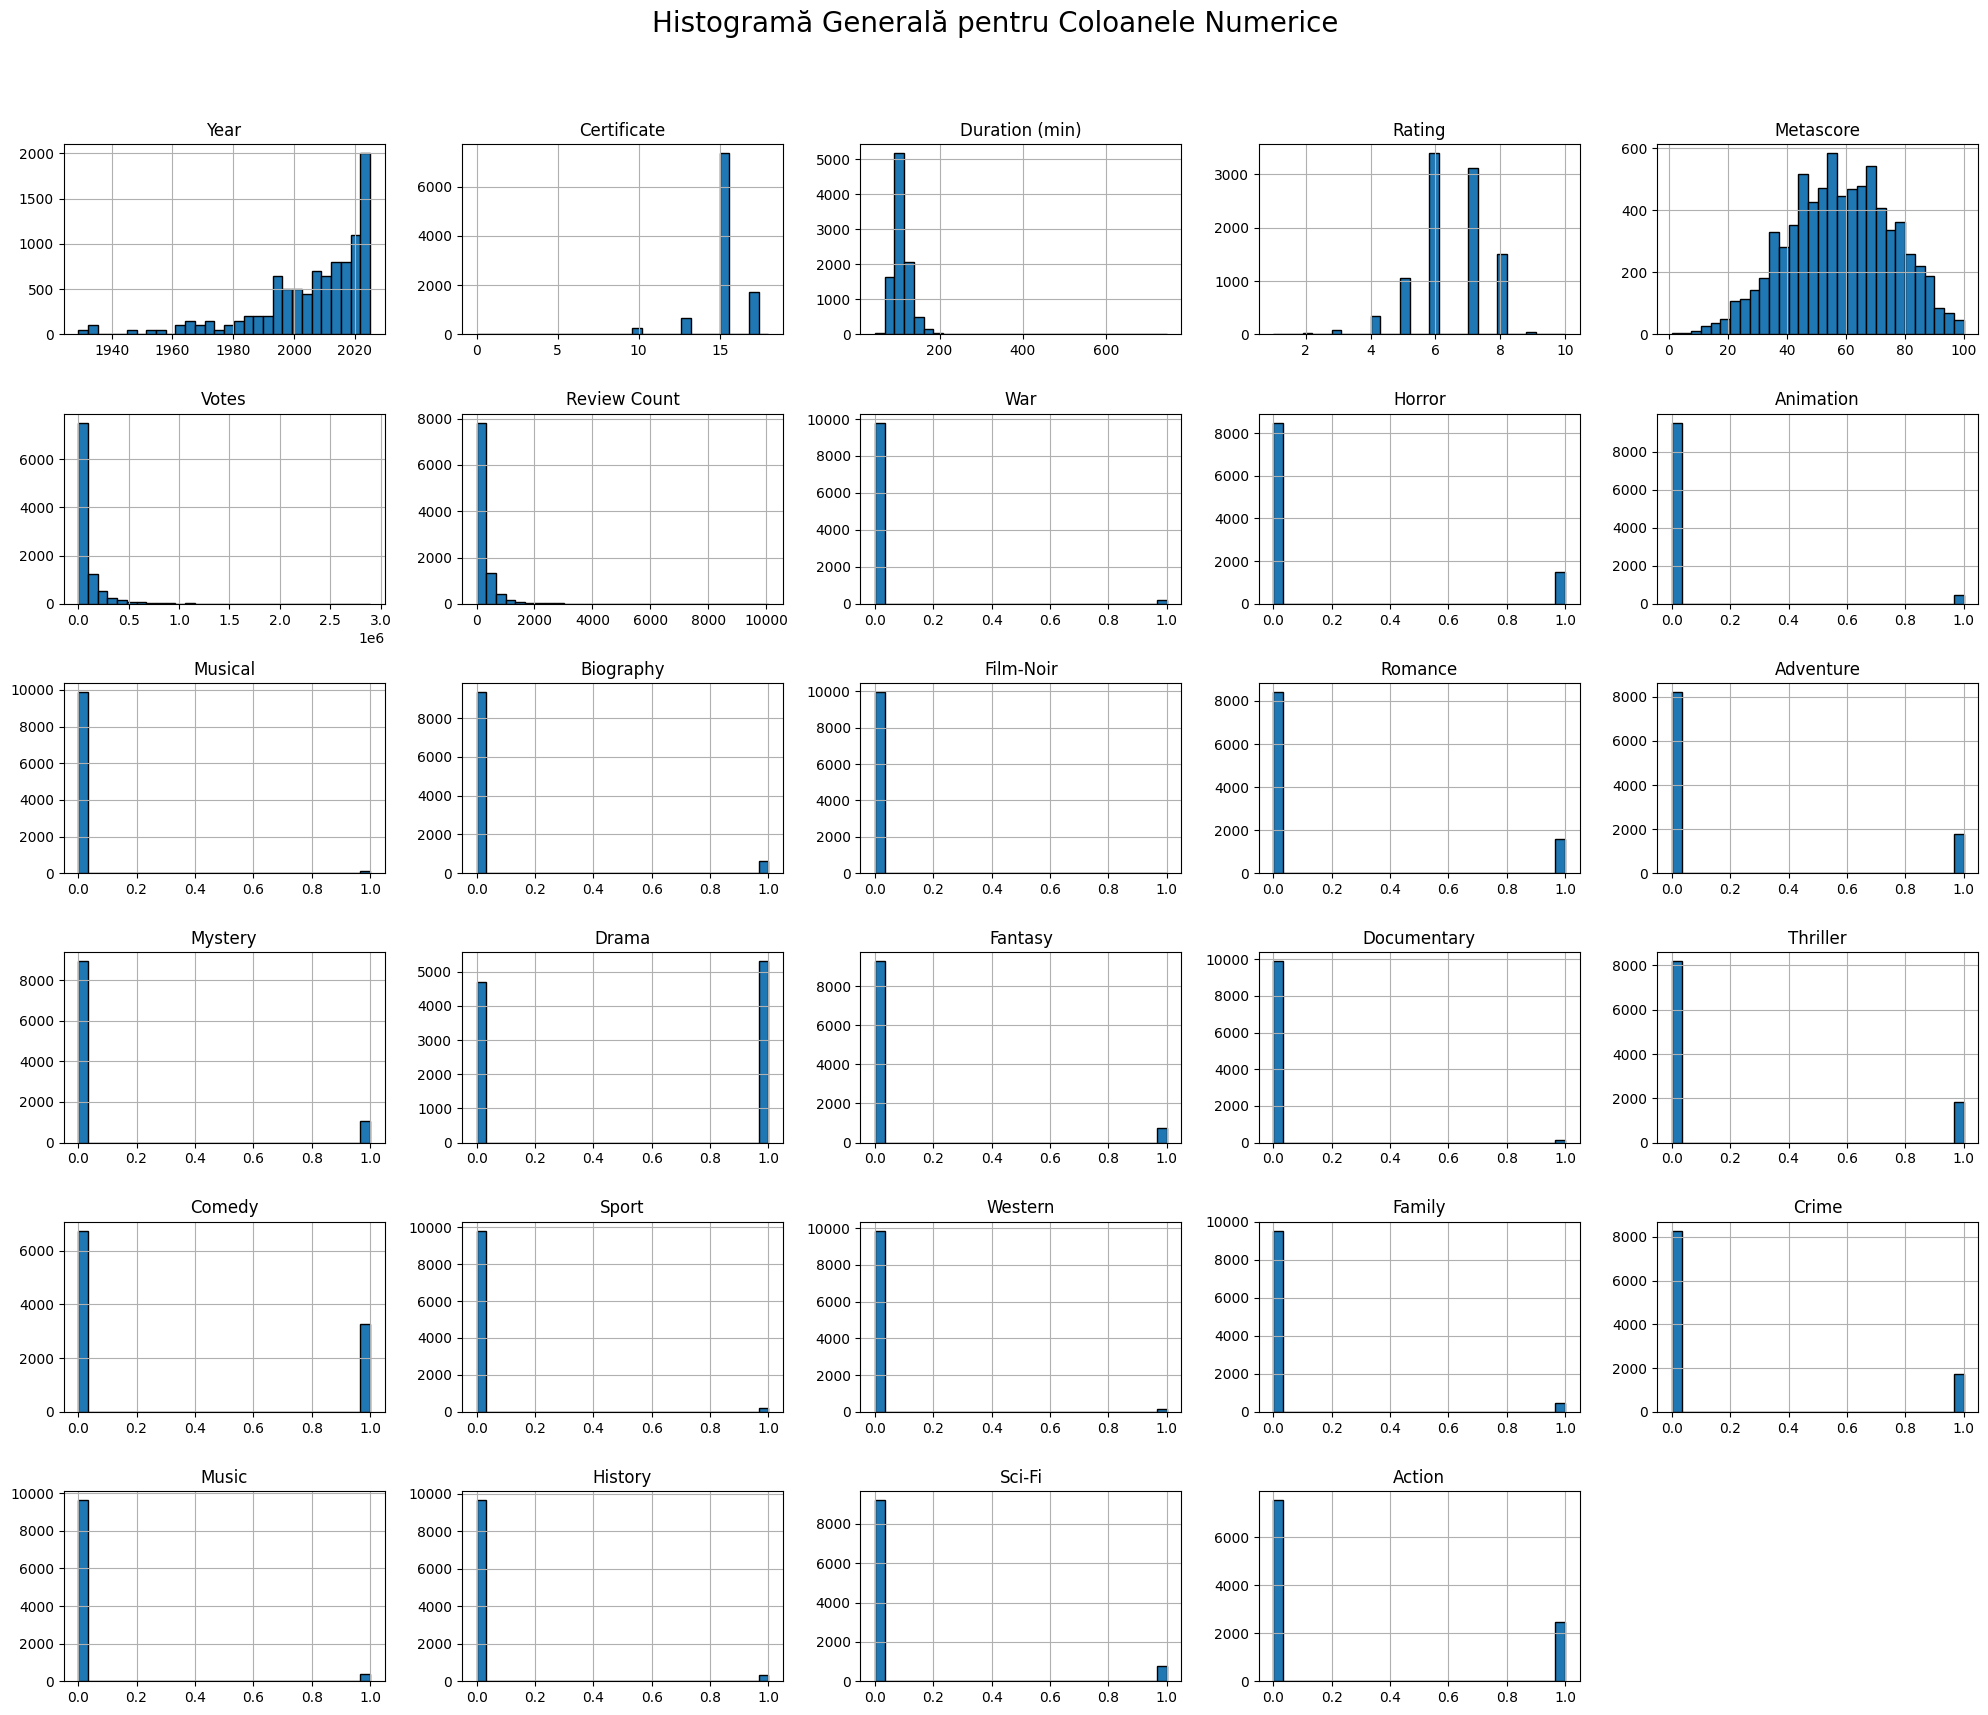

In [68]:
# Selectăm doar coloanele numerice pentru histogramă
numeric_cols = db.select_dtypes(include=['int64', 'float64'])

# Creăm histograme pentru toate coloanele numerice
numeric_cols.hist(figsize=(20, 18), bins=30, edgecolor='black')
plt.suptitle('Histogramă Generală pentru Coloanele Numerice', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [69]:
db['Year'] = db['Year'].interpolate(method='linear')

db['Duration (min)'] = db['Duration (min)'].fillna(db['Duration (min)'].median())

db['Rating'] = db['Rating'].fillna(db['Rating'].median())

db['Metascore'] = db['Metascore'].fillna(db['Metascore'].median())

In [70]:

db.isnull().sum()

Title             0
Year              0
Certificate       0
Duration (min)    0
Rating            0
Metascore         0
Director          0
Votes             0
Description       0
Review Count      0
War               0
Horror            0
Animation         0
Musical           0
Biography         0
Film-Noir         0
Romance           0
Adventure         0
Mystery           0
Drama             0
Fantasy           0
Documentary       0
Thriller          0
Comedy            0
Sport             0
Western           0
Family            0
Crime             0
Music             0
History           0
Sci-Fi            0
Action            0
dtype: int64

In [71]:
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Calculează entropia pentru fiecare coloană
entropy_per_column = db.apply(calculate_entropy)

# Afișează rezultatele
entropy_df = entropy_per_column.reset_index()
entropy_df.columns = ['Column', 'Entropy']
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

            Column    Entropy
8      Description  13.266978
0            Title  13.212554
7            Votes  12.840101
6         Director  11.569590
9     Review Count   9.063846
3   Duration (min)   6.144098
1             Year   5.566574
5        Metascore   5.377084
4           Rating   2.103105
2      Certificate   1.180438
19           Drama   0.997332
23          Comedy   0.911310
31          Action   0.806167
22        Thriller   0.684216
17       Adventure   0.677005
27           Crime   0.664522
16         Romance   0.631912
11          Horror   0.613333
18         Mystery   0.493244
30          Sci-Fi   0.399354
20         Fantasy   0.382497
14       Biography   0.348518
12       Animation   0.278270
26          Family   0.273948
28           Music   0.227423
29         History   0.210680
24           Sport   0.143122
10             War   0.142002
25         Western   0.110545
13         Musical   0.096314
21     Documentary   0.096314
15       Film-Noir   0.035218


In [72]:
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Calculează entropia pentru fiecare coloană
entropy_per_column = db.apply(calculate_entropy)

# Afișează rezultatele
entropy_df = entropy_per_column.reset_index()
entropy_df.columns = ['Column', 'Entropy']
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

            Column    Entropy
8      Description  13.266978
0            Title  13.212554
7            Votes  12.840101
6         Director  11.569590
9     Review Count   9.063846
3   Duration (min)   6.144098
1             Year   5.566574
5        Metascore   5.377084
4           Rating   2.103105
2      Certificate   1.180438
19           Drama   0.997332
23          Comedy   0.911310
31          Action   0.806167
22        Thriller   0.684216
17       Adventure   0.677005
27           Crime   0.664522
16         Romance   0.631912
11          Horror   0.613333
18         Mystery   0.493244
30          Sci-Fi   0.399354
20         Fantasy   0.382497
14       Biography   0.348518
12       Animation   0.278270
26          Family   0.273948
28           Music   0.227423
29         History   0.210680
24           Sport   0.143122
10             War   0.142002
25         Western   0.110545
13         Musical   0.096314
21     Documentary   0.096314
15       Film-Noir   0.035218


In [73]:
import pandas as pd
import numpy as np

# Asigură-te că coloana HighlyRated există
db['HighlyRated'] = (db['Rating'] > 5).astype(int)

# Function to calculate entropy
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Function to calculate Information Gain
def information_gain(feature, target):
    valid = feature.notna() & target.notna()
    feature = feature[valid]
    target = target[valid]
    total_entropy = calculate_entropy(target)
    weighted_entropy = 0
    for val in feature.unique():
        subset = target[feature == val]
        weighted_entropy += (len(subset) / len(target)) * calculate_entropy(subset)
    return total_entropy - weighted_entropy

# Columns to exclude
excluded_columns = {'Poster', 'Title', 'Cast', 'Description', 'Review Title', 'Review', 'Genre'}
valid_columns = [col for col in db.columns if col not in excluded_columns and col != 'HighlyRated' and db[col].nunique() > 1]

# Compute Information Gain
ig_values = {col: round(information_gain(db[col], db['HighlyRated']), 6) for col in valid_columns}

# Create DataFrame and sort
ig_db = pd.Series(ig_values).sort_values(ascending=False).reset_index()
ig_db.columns = ['Column', 'Information Gain']

# Show results
print(ig_db)

            Column  Information Gain
0           Rating          0.614823
1            Votes          0.580287
2         Director          0.439265
3        Metascore          0.138731
4     Review Count          0.113543
5   Duration (min)          0.068917
6             Year          0.022631
7            Drama          0.020582
8           Horror          0.016983
9        Biography          0.010015
10        Thriller          0.004051
11       Animation          0.003779
12         History          0.003305
13           Crime          0.003296
14     Certificate          0.002827
15             War          0.002411
16          Sci-Fi          0.001597
17           Music          0.001574
18     Documentary          0.000981
19         Fantasy          0.000967
20           Sport          0.000967
21       Film-Noir          0.000882
22          Action          0.000821
23          Family          0.000742
24         Romance          0.000685
25         Mystery          0.000611
2

In [74]:




# Facem o copie ca să nu modificăm db direct
db_copy = db.copy()
results = {}

# 1. Clasificare Rating: Low / Medium / High
db_copy['RatingClass'] = pd.cut(db_copy['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])
X = db_copy[['Votes', 'Duration (min)', 'Metascore', 'Certificate']]
y = db_copy['RatingClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train, y_train)
results['RatingClass'] = classification_report(y_test, clf.predict(X_test), zero_division=0)

# 2. Film pentru copii: Certificate <= 10
db_copy['ChildFriendly'] = db_copy['Certificate'].apply(lambda x: 1 if x <= 10 else 0)
X = db_copy[['Rating', 'Votes', 'Duration (min)', 'Metascore']]
y = db_copy['ChildFriendly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train, y_train)
results['ChildFriendly'] = classification_report(y_test, clf.predict(X_test), zero_division=0)

# 3. Popularitate în 3 categorii: Nepopular / Popular / Foarte popular
def popularity_class(votes):
    if votes <= 50000:
        return 'Not popular'
    elif (votes <= 100000 and votes >50000):
        return 'Popular'
    else:
        return 'Very popular'

db_copy['Popularity'] = db_copy['Votes'].apply(popularity_class)
X = db_copy[['Rating', 'Duration (min)', 'Metascore', 'Certificate']]
y = db_copy['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train, y_train)
results['Popularity'] = classification_report(y_test, clf.predict(X_test), zero_division=0)

# 4. Clasificare pentru fiecare gen de film
genre_columns = [col for col in db_copy.columns if db_copy[col].dropna().isin([0,1]).all() and col not in ['ChildFriendly']]
feature_cols = ['Rating', 'Votes', 'Duration (min)', 'Metascore', 'Certificate']
genre_results = {}

for genre in genre_columns:
    X = db_copy[feature_cols]
    y = db_copy[genre]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    clf.fit(X_train, y_train)
    report = classification_report(y_test, clf.predict(X_test), zero_division=0)
    genre_results[genre] = report

# 5. Decada lansării
db_copy['Decade'] = pd.cut(db_copy['Year'], bins=[1900, 2000, 2010, 2025], labels=['<2000', '2000–2010', '>2010'])
X = db_copy[['Rating', 'Votes', 'Metascore', 'Duration (min)', 'Certificate']]
y = db_copy['Decade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train, y_train)
results['Decade'] = classification_report(y_test, clf.predict(X_test), zero_division=0)

# Afișare rezultate generale
for key, report in results.items():
    print(f"=== {key} ===\n{report}\n")

# Afișare rezultate pe genuri
for genre, report in genre_results.items():
    print(f"=== Gen: {genre} ===\n{report}\n")

=== RatingClass ===
              precision    recall  f1-score   support

        High       0.62      0.40      0.49      1265
         Low       0.53      0.39      0.45      1194
      Medium       0.77      0.87      0.82      5541

    accuracy                           0.73      8000
   macro avg       0.64      0.56      0.59      8000
weighted avg       0.71      0.73      0.71      8000


=== ChildFriendly ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7777
           1       0.15      0.02      0.04       223

    accuracy                           0.97      8000
   macro avg       0.56      0.51      0.51      8000
weighted avg       0.95      0.97      0.96      8000


=== Popularity ===
              precision    recall  f1-score   support

 Not popular       0.68      0.87      0.77      4766
     Popular       0.27      0.08      0.12      1276
Very popular       0.53      0.42      0.47      1958

    accurac

In [ ]:


# Identificăm coloanele de gen (binar, 0/1)
genre_columns = [col for col in db.columns if db[col].dropna().isin([0, 1]).all() and col not in ['ChildFriendly']]

# Combinăm features numerice + genuri
features = ['Votes', 'Duration (min)', 'Metascore', 'Certificate'] + genre_columns

# Pregătim task-ul RatingClass
db['RatingClass'] = pd.cut(db['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Pregătim X și y, curățăm NaN
X = db[features]
y = db['RatingClass']
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# Împărțim în train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Random Forest cu genuri incluse
rf_model_genre = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=42)
rf_model_genre.fit(X_train, y_train)
y_pred_rf = rf_model_genre.predict(X_test)

# Linear Regression pentru predicția Rating
X_reg = db[features]
y_reg = db['Rating']
mask_reg = X_reg.notna().all(axis=1) & y_reg.notna()
X_reg = X_reg[mask_reg]
y_reg = y_reg[mask_reg]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.7, random_state=42)
linreg_genre = LinearRegression()
linreg_genre.fit(Xr_train, yr_train)
y_pred_lr = linreg_genre.predict(Xr_test)

# Evaluări
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

rf_report_genre = classification_report(y_test, y_pred_rf, zero_division=0)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

lr_mse = mean_squared_error(yr_test, y_pred_lr)
lr_r2 = r2_score(yr_test, y_pred_lr)

# Afișăm rezultatele
print("=== Random Forest (cu genuri) - RatingClass ===")
print(f"Accuracy: {rf_accuracy:.3f}")
print(rf_report_genre)

print("\n=== Linear Regression (cu genuri) - Rating ===")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R-squared (R²): {lr_r2:.2f}")

=== Random Forest (cu genuri) - RatingClass ===
Accuracy: 0.890
              precision    recall  f1-score   support

        High       0.82      0.40      0.54      1119
         Low       1.00      1.00      1.00      1013
      Medium       0.88      0.98      0.93      4868

    accuracy                           0.89      7000
   macro avg       0.90      0.79      0.82      7000
weighted avg       0.89      0.89      0.87      7000


=== Linear Regression (cu genuri) - Rating ===
Mean Squared Error (MSE): 0.36
R-squared (R²): 0.69


In [78]:



# Identificăm coloanele de gen (0/1)
genre_columns = [col for col in db.columns if db[col].dropna().isin([0, 1]).all() and col not in ['ChildFriendly']]

# Combinăm features numerice + genuri
features = ['Votes', 'Duration (min)', 'Metascore', 'Certificate'] + genre_columns

# Creăm RatingClass (Low, Medium, High)
db['RatingClass'] = pd.cut(db['Rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Selectăm X și y, și eliminăm rândurile cu NaN
X = db[features]
y = db['RatingClass']
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# Împărțim în train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Afișăm Precision, Recall, F1
report = classification_report(y_test, y_pred, zero_division=0)
print("=== Decision Tree Classifier - RatingClass ===")
print(report)

=== Decision Tree Classifier - RatingClass ===
              precision    recall  f1-score   support

        High       0.77      0.35      0.48       458
         Low       1.00      1.00      1.00       442
      Medium       0.87      0.98      0.92      2100

    accuracy                           0.89      3000
   macro avg       0.88      0.78      0.80      3000
weighted avg       0.88      0.89      0.87      3000



In [77]:
db.to_csv('C:\\Users\\Admin\\Desktop\\imdb\\imdb-movies-dataset-clean.csv',index=False)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


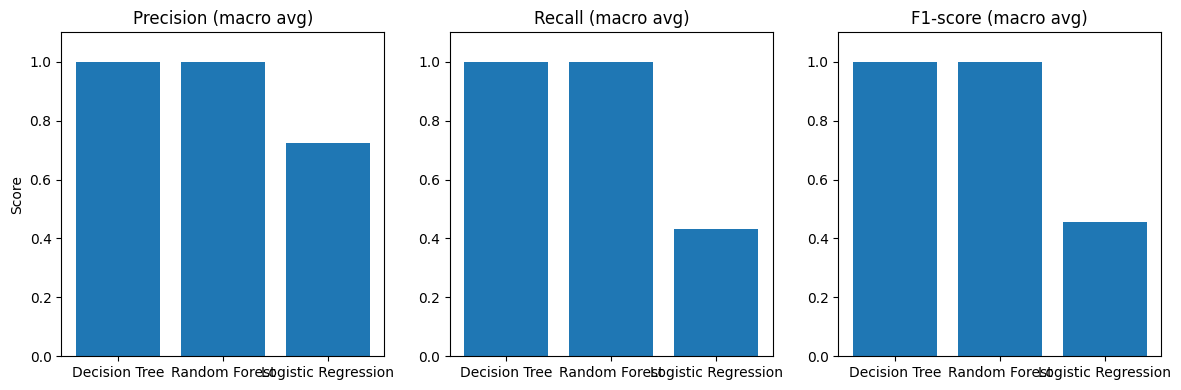

In [82]:
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression


db = pd.read_csv("C:\\Users\\Admin\\Desktop\\imdb\\imdb-movies-dataset-clean.csv")

# Prepare features and target
features = db[['Rating', 'Metascore', 'Votes', 'Review Count']]
target = db['RatingClass']
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

# Train the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Classification reports
dt_report = classification_report(y_test, dt_pred, target_names=le.classes_, output_dict=True)
rf_report = classification_report(y_test, rf_pred, target_names=le.classes_, output_dict=True)
lr_report = classification_report(y_test, lr_pred, target_names=le.classes_, output_dict=True)

# Extract metrics
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
precision_scores = [dt_report['macro avg']['precision'], rf_report['macro avg']['precision'], lr_report['macro avg']['precision']]
recall_scores = [dt_report['macro avg']['recall'], rf_report['macro avg']['recall'], lr_report['macro avg']['recall']]
f1_scores = [dt_report['macro avg']['f1-score'], rf_report['macro avg']['f1-score'], lr_report['macro avg']['f1-score']]

# Plot charts
plt.figure(figsize=(12, 4))

# Precision
plt.subplot(1, 3, 1)
plt.bar(models, precision_scores)
plt.title('Precision (macro avg)')
plt.ylim(0, 1.1)
plt.ylabel('Score')

# Recall
plt.subplot(1, 3, 2)
plt.bar(models, recall_scores)
plt.title('Recall (macro avg)')
plt.ylim(0, 1.1)

# F1-score
plt.subplot(1, 3, 3)
plt.bar(models, f1_scores)
plt.title('F1-score (macro avg)')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()